# Pandas

In [3]:
import pandas as pd

# Create a sample DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, 30, 35, None],
        'salary': [50000, 60000, 75000, 65000]}
df = pd.DataFrame(data)

# Display basic info
print("DataFrame Info:")
print(df.info())

# Handle missing values
df['age'].fillna(df['age'].mean(), inplace=True)

# Filter employees with salary > 60000
high_earners = df[df['salary'] > 60000]
print("\nHigh Earners:")
print(high_earners)

# Group by age and calculate average salary
avg_salary_by_age = df.groupby('age')['salary'].mean()
print("\nAverage Salary by Age:")
print(avg_salary_by_age)

# Save to CSV
df.to_csv('employees.csv', index=False)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    4 non-null      object 
 1   age     3 non-null      float64
 2   salary  4 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes
None

High Earners:
      name   age  salary
2  Charlie  35.0   75000
3    David  30.0   65000

Average Salary by Age:
age
25.0    50000.0
30.0    62500.0
35.0    75000.0
Name: salary, dtype: float64


/var/folders/cl/xs3r9fl57ljbm8gx8vcv7t3w0000gn/T/ipykernel_81266/145801511.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


# Matplotlib

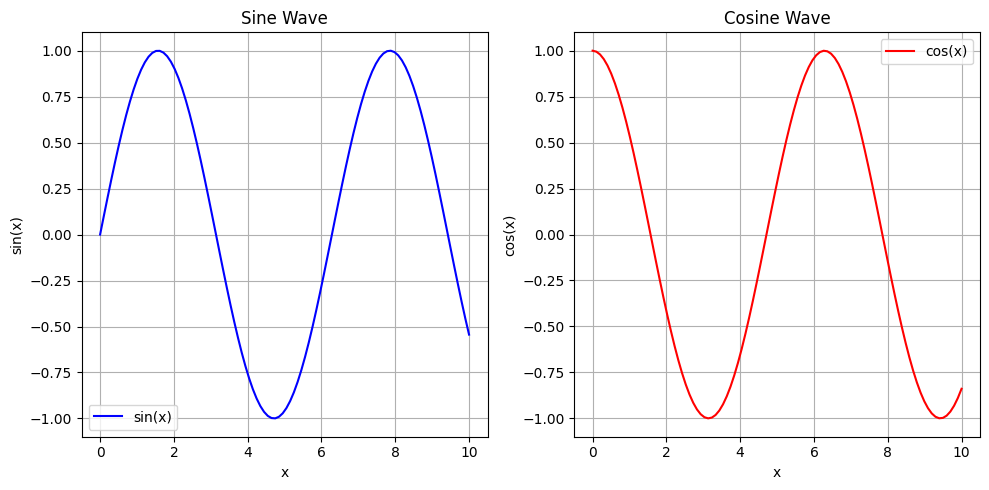

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Sine wave
plt.subplot(1, 2, 1)
plt.plot(x, y1, color='blue', label='sin(x)')
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)

# Second subplot: Cosine wave
plt.subplot(1, 2, 2)
plt.plot(x, y2, color='red', label='cos(x)')
plt.title('Cosine Wave')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Pratice yourself!

資料概覽：
         Date   Product     Category  Quantity  Price
0  2023-01-01    Laptop  Electronics         5   1000
1  2023-01-01     Mouse  Electronics        10     20
2  2023-01-01      Desk    Furniture         3    150
3  2023-01-02    Laptop  Electronics         3   1000
4  2023-01-02  Keyboard  Electronics         8     50

資料形狀: (16, 5)
欄位名稱: ['Date', 'Product', 'Category', 'Quantity', 'Price']
類別總結：
              Total_Sales  Quantity
Category                          
Electronics        21160        79
Furniture           1500        11
銷售額最高的產品是: Laptop，總銷售額: 19000


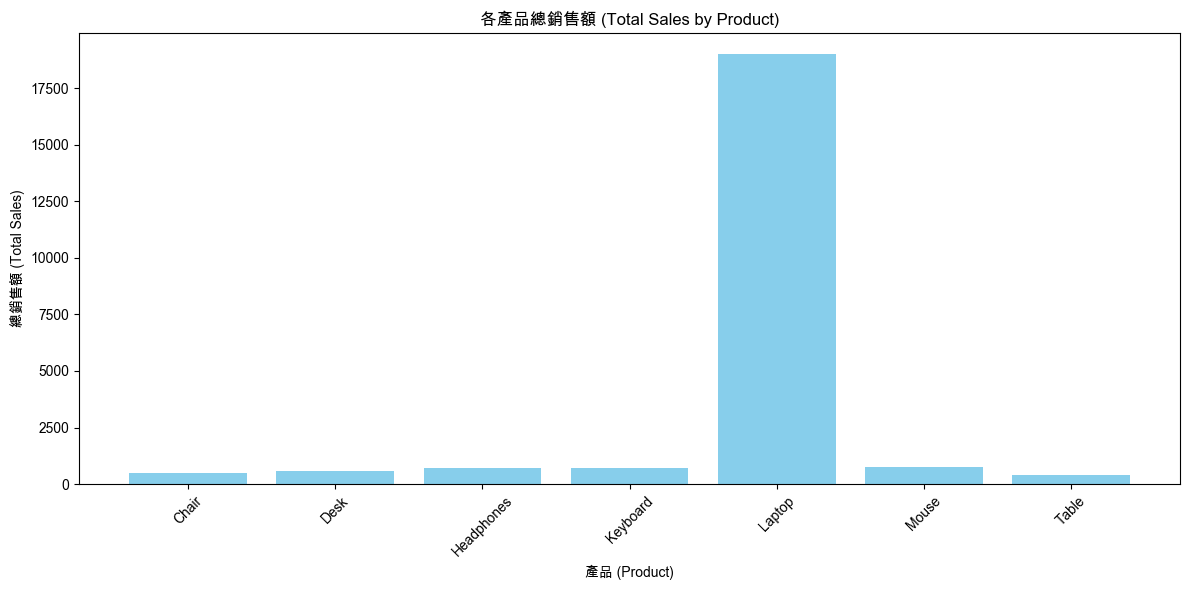

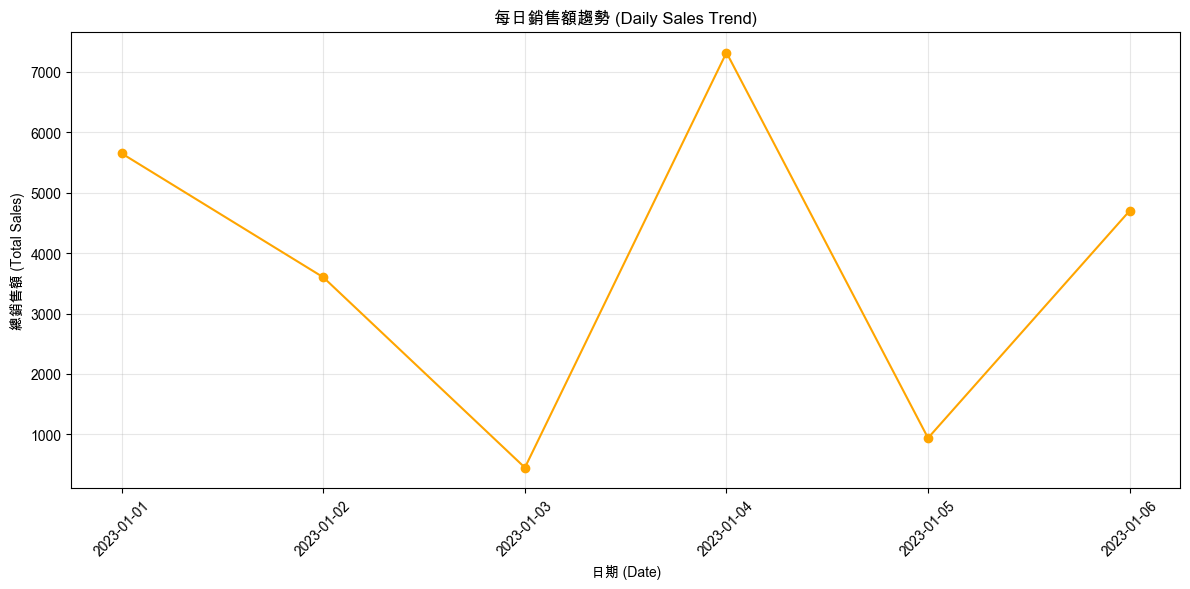


=== 額外統計資訊 ===
總銷售額: 22,660.00
平均每筆交易金額: 1416.25
交易筆數: 16
銷售日期範圍: 2023-01-01 00:00:00 到 2023-01-06 00:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定中文字體（解決中文顯示問題）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. 讀取資料
df = pd.read_csv('/Users/lucas/Documents/lab15/sales_data.csv')  # 讀取 sales_data.csv

# 顯示資料基本資訊
print("資料概覽：")
print(df.head())
print(f"\n資料形狀: {df.shape}")
print(f"欄位名稱: {list(df.columns)}")

# 2. 新增 Total_Sales 欄位（Quantity × Price）
df['Total_Sales'] = df['Quantity'] * df['Price']  # 計算每筆交易的總銷售額

# 3. 按 Category 分組，計算總銷售額和總數量
category_summary = df.groupby('Category')[['Total_Sales', 'Quantity']].sum()  # 分組並計算總和
print("類別總結：\n", category_summary)

# 4. 找出銷售額最高的產品
product_sales = df.groupby('Product')['Total_Sales'].sum()  # 按產品分組計算總銷售額
top_product = product_sales.idxmax()  # 找出銷售額最高的產品
top_sales = product_sales.max()  # 計算最高銷售額
print(f"銷售額最高的產品是: {top_product}，總銷售額: {top_sales}")

# 5. 繪製柱狀圖：每個產品的總銷售額
plt.figure(figsize=(12, 6))  # 設定圖表大小
product_sales = df.groupby('Product')['Total_Sales'].sum()  # 按產品分組計算總銷售額
plt.bar(product_sales.index, product_sales.values, color='skyblue')  # 繪製柱狀圖
plt.title('各產品總銷售額 (Total Sales by Product)')  # 圖表標題
plt.xlabel('產品 (Product)')  # x 軸標籤
plt.ylabel('總銷售額 (Total Sales)')  # y 軸標籤
plt.xticks(rotation=45)  # 旋轉x軸標籤以避免重疊
plt.tight_layout()  # 自動調整佈局
plt.savefig('sales_by_product.png')
plt.show()

# 6. 繪製折線圖：每天的總銷售額
# 確保日期欄位是datetime格式
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Sales'].sum()  # 按日期分組計算總銷售額
plt.figure(figsize=(12, 6))  # 設定圖表大小
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='orange')  # 繪製折線圖
plt.title('每日銷售額趨勢 (Daily Sales Trend)')  # 圖表標題
plt.xlabel('日期 (Date)')  # x 軸標籤
plt.ylabel('總銷售額 (Total Sales)')  # y 軸標籤
plt.xticks(rotation=45)  # 旋轉 x 軸標籤
plt.grid(True, alpha=0.3)  # 添加網格線
plt.tight_layout()  # 自動調整佈局
plt.savefig('daily_sales_trend.png')
plt.show()

# 額外的統計資訊
print("\n=== 額外統計資訊 ===")
print(f"總銷售額: {df['Total_Sales'].sum():,.2f}")
print(f"平均每筆交易金額: {df['Total_Sales'].mean():.2f}")
print(f"交易筆數: {len(df)}")
print(f"銷售日期範圍: {df['Date'].min()} 到 {df['Date'].max()}")